### Шагиахметов Адель ИУ5-63, вариант 17, задача 3 датасет 1

Сразу берем датасет 2, потому что в датасете 1 совсем мало данных и они все зависимы друг от друга

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.datasets import load_wine as source
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

base_df = source()
base_df = pd.DataFrame(data= np.c_[base_df['data'], base_df['target']],
                     columns= base_df['feature_names'] + ['target'])
base_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Проведем масштабирование признака color_intensity

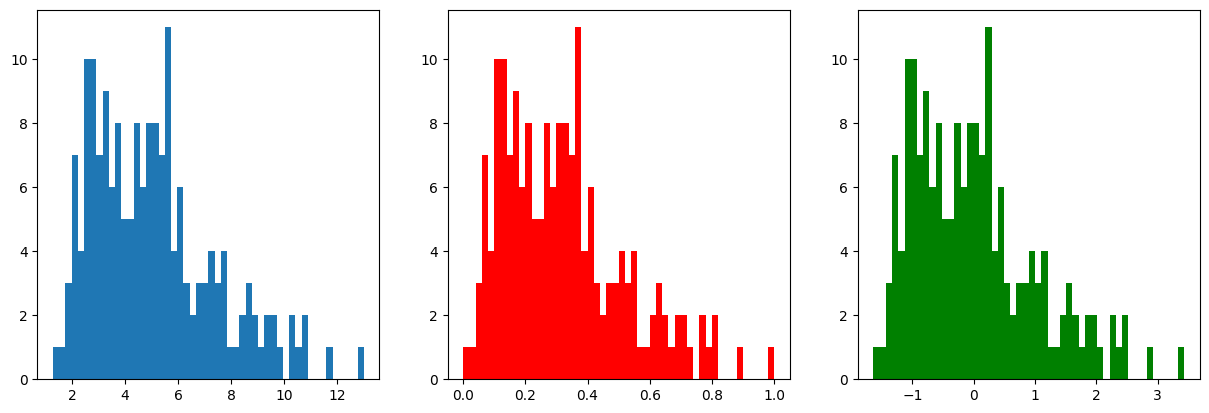

In [81]:
sc1 = MinMaxScaler()
sc2 = StandardScaler()
mash_1 = sc1.fit_transform(base_df[["color_intensity"]])
mash_2 = sc2.fit_transform(base_df[["color_intensity"]])

base_df["mashed_1"] = [m[0] for m in mash_1]
base_df["mashed_2"] = [m[0] for m in mash_2]

f, axs = plt.subplots(1, 3)
f.set_figwidth(15)

axs[0].hist(base_df["color_intensity"], 50);
axs[1].hist(base_df["mashed_1"], 50, color="r");
axs[2].hist(base_df["mashed_2"], 50, color="g");

In [82]:
labels = ["{0} - {1}".format(i, i + 3) for i in range(0, 100, 3)]
base_df["alc_ammount"] =  pd.cut(base_df.alcohol, range(0, 105, 3), right=False, labels=labels)

le = LabelEncoder()
base_df["alc_label_encoded"] = le.fit_transform(base_df["alc_ammount"])

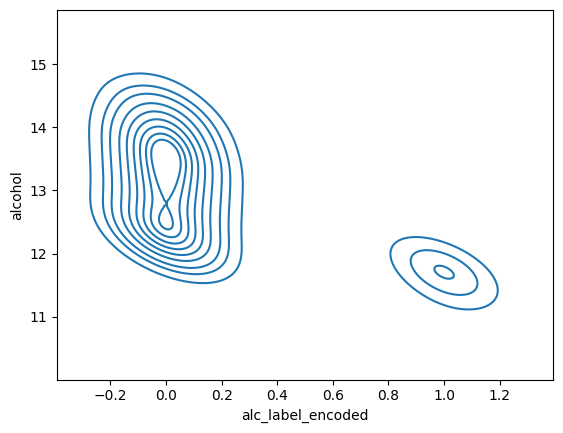

In [83]:
sns.kdeplot(
    data=base_df,
    x="alc_label_encoded",
    y="alcohol",
    thresh=.1,
);

Удачно переведено, иначе sns бы не сработал

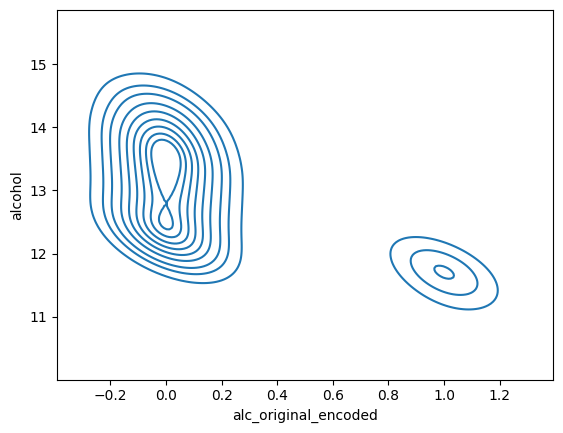

In [85]:
oe = OrdinalEncoder()
base_df["alc_original_encoded"] = oe.fit_transform(base_df[["alc_ammount"]])
sns.kdeplot(
    data=base_df,
    x="alc_original_encoded",
    y="alcohol",
    thresh=.1,
);

Так как разбиение на категории была искуственной, особо разницы не видно, но задача выполнена